In [ ]:
pip install twitter

     |████████████████████████████████| 61kB 3.1MB/s 


In [ ]:
import numpy as np
import pandas as pd
import re
import datetime
from nltk.stem.porter import *
from nltk.corpus import stopwords
from pandas.tseries import offsets
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import twitter
import time

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
dataSP = pd.read_excel('/content/drive/MyDrive/758A: Text Mining/SPY-ETF-HistoricData.xlsx')

In [ ]:
datanews= pd.read_csv('/content/drive/MyDrive/758A: Text Mining/Three Topic Data/news_senti_project1 - newsfinal.csv').drop('Unnamed: 0',axis=1)

In [ ]:
datacovid=pd.read_excel('/content/drive/MyDrive/758A: Text Mining/Three Topic Data/covidfinal.xlsx').drop('Unnamed: 0',axis=1)

In [ ]:
datacovid.columns=['date','text','topic','Happy_Twi']

In [ ]:
dataairline=pd.read_excel('/content/drive/MyDrive/758A: Text Mining/Three Topic Data/airfinal.xlsx').drop('Unnamed: 0',axis=1)

In [ ]:
text_data=pd.concat([dataairline,datacovid,datanews]).reset_index().drop('index',axis=1)

In [ ]:
datanews=text_data

In [ ]:
import pandas as pd
import datetime
from datetime import datetime
from datetime import timedelta

In [ ]:
for i in dataSP.index:
  a=dataSP['Date'][i]
  b=(a+ timedelta(days=1)).strftime("%Y-%m-%d")
  dataSP.loc[i,'Date']=pd.to_datetime(b)

In [ ]:
datanews['date']=pd.to_datetime(datanews['date'])

In [ ]:
final=pd.merge(datanews,dataSP,left_on='date',right_on='Date').drop(['topic','Date','Close','Date_converted','Close.1','Categorical_2'],axis=1)

In [ ]:
final.to_csv('final_data.csv')

In [ ]:
#Open CSV file using a Pandas dataframe

#Open CSV file using a Pandas dataframe

#Create a new where the date column in your CSV is transformed to a Pandas datetime object

for i in dataSP.index:
  a=dataSP['Date'][i]
  b=(a+ timedelta(days=1)).strftime("%Y-%m-%d")
  dataSP.loc[i,'Date']=pd.to_datetime(b)

In [ ]:
final.date[1]

Timestamp('2019-11-02 00:00:00')

In [ ]:
final

,date,text,Happy_Twi,Percentage_change_continuous,Market_Sentiment_ -_ Categorial
0,2019-11-02,#ExploreChina The glittering lights of #Shangh...,1.0,0.00966236,1
1,2019-11-02,#AirChina ’s launched another new route! Can y...,1.0,0.00966236,1
2,2019-11-01,144-hour visa-free transit is now available in...,1.0,-0.00302287,-1
3,2019-11-01,"#KnowBeforeYouGo Transiting in Chengdu, Beijin...",1.0,-0.00302287,-1
4,2019-10-31,#AirChina wishes you a happy Halloween! What a...,0.0,0.00325333,1
...,...,...,...,...,...
1122,2020-10-27,RT @whanbam1: Delete them? What are @bathunive...,0.0,-0.0185895,-1
1123,2020-10-27,Big increase in nos. of covid cases at U of #L...,0.0,-0.0185895,-1
1124,2020-10-27,RT @kingstonucu: We agree 100%. Weirdly compet...,1.0,-0.0185895,-1
1125,2020-10-27,#Kingston Uni launch a dashboard.\nIt makes pr...,1.0,-0.0185895,-1


#Create a new column which lower-cases and filters out the following from the text:Punctuation  Numbers   Syntax, XML, HTML

In [ ]:
def clean_text(text):
    new_text = text.lower()
    new_text = re.sub('http[s]*://[a-z0-9.!@#$%^&*?_/=:\-+~`]*','',new_text)
    new_text = re.sub("[^a-z]"," ", new_text)
    return new_text

final['new_text'] = final['text'].apply(clean_text)
final.head()

,date,text,Happy_Twi,Percentage_change_continuous,Market_Sentiment_ -_ Categorial,new_text
0,2019-11-02,#ExploreChina The glittering lights of #Shangh...,1.0,0.00966236,1,explorechina the glittering lights of shangh...
1,2019-11-02,#AirChina ’s launched another new route! Can y...,1.0,0.00966236,1,airchina s launched another new route can y...
2,2019-11-01,144-hour visa-free transit is now available in...,1.0,-0.00302287,-1,hour visa free transit is now available in...
3,2019-11-01,"#KnowBeforeYouGo Transiting in Chengdu, Beijin...",1.0,-0.00302287,-1,knowbeforeyougo transiting in chengdu beijin...
4,2019-10-31,#AirChina wishes you a happy Halloween! What a...,0.0,0.00325333,1,airchina wishes you a happy halloween what a...


#Create a new column which tokenizes the text, lemmatizes each token and removes any stop words (i.e. it should be a list in the end)

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk import pos_tag
import nltk
from nltk.corpus import wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
from nltk.corpus import stopwords
sw = set(stopwords.words("english"))

def generate_tokens(text):
    tokens = text.split()
    tokens = [stemmer.stem(el) for el in tokens]
    tokens_pos = nltk.pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(el[0],get_wordnet_pos(el[1])) for  el in tokens_pos]
    tokens = [el for el in tokens if el not in sw]
    return tokens

final['tokens'] = final['new_text'].apply(generate_tokens)
final['clean_text'] = [' '.join(final.tokens[i]) for i in range(0,len(final))]
final.head()

,date,text,Happy_Twi,Percentage_change_continuous,Market_Sentiment_ -_ Categorial,new_text,tokens,clean_text
0,2019-11-02,#ExploreChina The glittering lights of #Shangh...,1.0,0.00966236,1,explorechina the glittering lights of shangh...,"[explorechina, glitter, light, shanghai, world...",explorechina glitter light shanghai world famo...
1,2019-11-02,#AirChina ’s launched another new route! Can y...,1.0,0.00966236,1,airchina s launched another new route can y...,"[airchina, launch, anoth, new, rout, guess, sh...",airchina launch anoth new rout guess share gue...
2,2019-11-01,144-hour visa-free transit is now available in...,1.0,-0.00302287,-1,hour visa free transit is now available in...,"[hour, visa, free, transit, avail, dozen, citi...",hour visa free transit avail dozen citi across...
3,2019-11-01,"#KnowBeforeYouGo Transiting in Chengdu, Beijin...",1.0,-0.00302287,-1,knowbeforeyougo transiting in chengdu beijin...,"[knowbeforeyougo, transit, chengdu, beij, chon...",knowbeforeyougo transit chengdu beij chongq lu...
4,2019-10-31,#AirChina wishes you a happy Halloween! What a...,0.0,0.00325333,1,airchina wishes you a happy halloween what a...,"[airchina, wish, happi, halloween, dress, thi,...",airchina wish happi halloween dress thi spooki...


In [ ]:
final=final.dropna(axis=0).reset_index().drop('index',axis=1)

In [ ]:
final.loc[483,'Happy_Twi']=1

#Compute the Term-Frequency Inverse Document Frequency Matrix for the cleaned, tokenized word column you created in 4). What is the TF measure you are using? What is the IDF measure you are using? Which words have the highest TF, IDF and TF-IDF measure?

##TF we used: # of time term j appears in document i / # of tokens in document i
##IDF we used: log(# of Documents / # of Documents containing term j)

tfidfi,j=tfi,j∗idfj

In [ ]:
     from           sklearn.feature_extraction.text           import           CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer()

In [ ]:
vectorizer =  CountVectorizer()
X = vectorizer.fit_transform(final['clean_text'])

In [ ]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(vectorizer.get_feature_names())

['aaronkaterski', 'aaronsojourn', 'abbi', 'abc', 'abcnewsl', 'abigailwozniak', 'abl', 'abov', 'abroad', 'absolut', 'abus', 'academ', 'acceler', 'accept', 'access', 'acclaim', 'accommod', 'accompani', 'accord', 'account', 'accur', 'accus', 'achiev', 'acknowledg', 'acorn', 'across', 'act', 'action', 'activ', 'activenav', 'activist', 'actual', 'acumen', 'acupunctureuss', 'ad', 'add', 'addict', 'addit', 'address', 'adjust', 'administr', 'admiss', 'admit', 'adrenalin', 'adult', 'advanc', 'advantag', 'adventur', 'advis', 'advisor', 'advisori', 'aeroplan', 'aerospac', 'affect', 'afford', 'afghanistan', 'afraid', 'africa', 'african', 'aft', 'afternoon', 'age', 'agenc', 'agent', 'aggress', 'ago', 'agre', 'ahead', 'ai', 'aid', 'ail', 'air', 'airborn', 'airbu', 'airchina', 'aircraft', 'airlin', 'airlinegeek', 'airp', 'airplan', 'airpor', 'airport', 'airtravel', 'airway', 'aka', 'al', 'alabama', 'alan', 'alarm', 'alcohol', 'aldon', 'alert', 'alex', 'alexi', 'alexsalvinew', 'alien', 'align', 'aliss

In [ ]:
sentences_df =    pd.DataFrame(columns=vectorizer.get_feature_names(),data           =           X.toarray())
sentences_df

,aaronkaterski,aaronsojourn,abbi,abc,abcnewsl,abigailwozniak,abl,abov,abroad,absolut,abus,academ,acceler,accept,access,acclaim,accommod,accompani,accord,account,accur,accus,achiev,acknowledg,acorn,across,act,action,activ,activenav,activist,actual,acumen,acupunctureuss,ad,add,addict,addit,address,adjust,...,worldkindnessday,worldpeaceday,worldwid,worri,wors,worsen,worship,worth,worthi,would,wr,wrap,write,writer,wsprigg,wuxi,wyom,xbox,xi,xwb,yang,ye,year,yearli,yep,yesterday,yet,yo,york,yorkshir,young,youth,yuuuup,zanzibar,zealand,zebrafish,zhujiang,zipper,zombi,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##TF

In [ ]:
df_tf= pd.DataFrame(columns=vectorizer.get_feature_names(),index=sentences_df.index)

In [ ]:
for i in df_tf.columns:
  for j in df_tf.index:
    df_tf.loc[j,i]=sentences_df.loc[j,i]/len(final['tokens'][j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_tf_nona=df_tf.dropna(axis=0)

In [ ]:
df_tf_nona.max()

aaronkaterski    0.090909
aaronsojourn     0.111111
abbi             0.062500
abc              0.125000
abcnewsl         0.125000
                   ...   
zebrafish        0.058824
zhujiang         0.090909
zipper           0.111111
zombi            0.111111
zoom             0.125000
Length: 3289, dtype: float64

In [ ]:
a=df_tf_nona.max()

In [ ]:
for i in a.index:
  if a.loc[i,]==a.max():
    print(i)

yep


##Yep has the highest tf

##IDF

In [ ]:
df_idf= pd.DataFrame(columns=vectorizer.get_feature_names(),index=sentences_df.index)

In [ ]:
nn=len(df_idf)

In [ ]:
for i in df_idf.columns:
  jj=0
  for j in df_idf.index:
    if sentences_df.loc[j,i]!=0:
      jj=jj+1
  df_idf.loc[:,i]=np.log(nn/jj)

In [ ]:
df_idf

,aaronkaterski,aaronsojourn,abbi,abc,abcnewsl,abigailwozniak,abl,abov,abroad,absolut,abus,academ,acceler,accept,access,acclaim,accommod,accompani,accord,account,accur,accus,achiev,acknowledg,acorn,across,act,action,activ,activenav,activist,actual,acumen,acupunctureuss,ad,add,addict,addit,address,adjust,...,worldkindnessday,worldpeaceday,worldwid,worri,wors,worsen,worship,worth,worthi,would,wr,wrap,write,writer,wsprigg,wuxi,wyom,xbox,xi,xwb,yang,ye,year,yearli,yep,yesterday,yet,yo,york,yorkshir,young,youth,yuuuup,zanzibar,zealand,zebrafish,zhujiang,zipper,zombi,zoom
0,7.026427,6.33328,7.026427,5.416989,5.927815,4.829202,7.026427,5.640132,6.33328,5.927815,7.026427,6.33328,7.026427,7.026427,5.234667,7.026427,5.927815,7.026427,4.829202,6.33328,7.026427,5.080517,6.33328,7.026427,7.026427,4.387369,5.927815,7.026427,6.33328,7.026427,7.026427,6.33328,7.026427,7.026427,5.416989,7.026427,7.026427,7.026427,5.640132,6.33328,...,7.026427,7.026427,6.33328,5.640132,6.33328,7.026427,5.927815,6.33328,7.026427,4.193213,7.026427,7.026427,5.234667,7.026427,6.33328,7.026427,6.33328,6.33328,5.927815,7.026427,7.026427,5.416989,3.415509,7.026427,7.026427,5.927815,6.33328,4.946985,4.318377,7.026427,5.927815,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,5.927815
1,7.026427,6.33328,7.026427,5.416989,5.927815,4.829202,7.026427,5.640132,6.33328,5.927815,7.026427,6.33328,7.026427,7.026427,5.234667,7.026427,5.927815,7.026427,4.829202,6.33328,7.026427,5.080517,6.33328,7.026427,7.026427,4.387369,5.927815,7.026427,6.33328,7.026427,7.026427,6.33328,7.026427,7.026427,5.416989,7.026427,7.026427,7.026427,5.640132,6.33328,...,7.026427,7.026427,6.33328,5.640132,6.33328,7.026427,5.927815,6.33328,7.026427,4.193213,7.026427,7.026427,5.234667,7.026427,6.33328,7.026427,6.33328,6.33328,5.927815,7.026427,7.026427,5.416989,3.415509,7.026427,7.026427,5.927815,6.33328,4.946985,4.318377,7.026427,5.927815,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,5.927815
2,7.026427,6.33328,7.026427,5.416989,5.927815,4.829202,7.026427,5.640132,6.33328,5.927815,7.026427,6.33328,7.026427,7.026427,5.234667,7.026427,5.927815,7.026427,4.829202,6.33328,7.026427,5.080517,6.33328,7.026427,7.026427,4.387369,5.927815,7.026427,6.33328,7.026427,7.026427,6.33328,7.026427,7.026427,5.416989,7.026427,7.026427,7.026427,5.640132,6.33328,...,7.026427,7.026427,6.33328,5.640132,6.33328,7.026427,5.927815,6.33328,7.026427,4.193213,7.026427,7.026427,5.234667,7.026427,6.33328,7.026427,6.33328,6.33328,5.927815,7.026427,7.026427,5.416989,3.415509,7.026427,7.026427,5.927815,6.33328,4.946985,4.318377,7.026427,5.927815,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,5.927815
3,7.026427,6.33328,7.026427,5.416989,5.927815,4.829202,7.026427,5.640132,6.33328,5.927815,7.026427,6.33328,7.026427,7.026427,5.234667,7.026427,5.927815,7.026427,4.829202,6.33328,7.026427,5.080517,6.33328,7.026427,7.026427,4.387369,5.927815,7.026427,6.33328,7.026427,7.026427,6.33328,7.026427,7.026427,5.416989,7.026427,7.026427,7.026427,5.640132,6.33328,...,7.026427,7.026427,6.33328,5.640132,6.33328,7.026427,5.927815,6.33328,7.026427,4.193213,7.026427,7.026427,5.234667,7.026427,6.33328,7.026427,6.33328,6.33328,5.927815,7.026427,7.026427,5.416989,3.415509,7.026427,7.026427,5.927815,6.33328,4.946985,4.318377,7.026427,5.927815,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,7.026427,5.927815
4,7.026427,6.33328,7.026427,5.416989,5.927815,4.829202,7.026427,5.640132,6.33328,5.927815,7.026427,6.33328,7.026427,7.026427,5.234667,7.026427,5.927815,7.026427,4.829202,6.33328,7.026427,5.080517,6.33328,7.026427,7.026427,4.387369,5.927815,7.026427,6.33328,7.026427,7.026427,6.33328,7.026427,7.026427,5.416989,7.026427,7.026427,7.026427,5.640132,6.33328,...,7.026427,7.026427,6.33328,5.640132,6.33328,7.026427,5.927815,6.33328,7.026427,4.193213,7.026427,7.026427,5.234667,7.026427,6.33328,7.026427,6.33328,6.33328,5.927815,7.026427,7.026427,5.416989,3.415509,7.026427,7.026427,5.92781

In [ ]:
a=df_idf.max()

In [ ]:
a.max

<bound method Series.max of aaronkaterski    7.026427
aaronsojourn     6.333280
abbi             7.026427
abc              5.416989
abcnewsl         5.927815
                   ...   
zebrafish        7.026427
zhujiang         7.026427
zipper           7.026427
zombi            7.026427
zoom             5.927815
Length: 3289, dtype: float64>

In [ ]:
for i in a.index:
  if a.loc[i,]==a.max():
    print(i)

aaronkaterski
abbi
abl
abus
acceler
accept
acclaim
accompani
accur
acknowledg
acorn
action
activenav
activist
acumen
acupunctureuss
add
addict
addit
adrenalin
adult
advanc
advisori
aeroplan
aerospac
afghanistan
afraid
aft
afternoon
agent
aggress
agre
ai
ail
airborn
airlinegeek
airp
airtravel
airway
aka
alan
alcohol
aldon
alexi
alien
align
alissa
allegi
allegiantstadm
alley
allianc
alon
altern
although
ama
ambassador
ambulatori
ameri
analysisi
andrew
annelies
anniversari
antibodi
anticip
antimicrobialresist
anx
anxieti
anxiou
anymor
anyon
anyth
anytim
anyway
anywher
aparekhbpc
appal
appoint
appointe
appreci
approach
arch
architect
archiv
arctic
argen
argentinian
arlardieri
arrest
ashley
ashworth
asid
aspen
assembl
assert
assi
assum
astrazeneca
ataturk
atmospher
att
attack
attract
av
avagcerobinson
averag
avgeek
avod
awar
azar
azur
background
bacteria
badg
bag
baikal
baiyun
baltimor
bamboo
bangkok
barri
basi
basic
basketbal
bath
bathunivers
batter
battlefield
battleground
bbcbreak
bbcfoo

Many words have the highest idf which are listed above.

##TF-IDF

In [ ]:
df_tfidf= pd.DataFrame(columns=vectorizer.get_feature_names(),index=sentences_df.index)

In [ ]:
for i in df_tfidf.columns:
  for j in df_tfidf.index:
    df_tfidf.loc[j,i]=df_tf.loc[j,i]*df_idf.loc[j,i]

In [ ]:
a=df_tfidf.max()

In [ ]:
for i in a.index:
  if a.loc[i,]==a.max():
    print(i)

yep


yep has the most highest value of tf-idf

#Create a time series chart showing the average word count per time period over time

In [ ]:
sentences_df['date']=final['date']

In [ ]:
sentences_df.groupby(['date']).mean()

,aaronkaterski,aaronsojourn,abbi,abc,abcnewsl,abigailwozniak,abl,abov,abroad,absolut,abus,academ,acceler,accept,access,acclaim,accommod,accompani,accord,account,accur,accus,achiev,acknowledg,acorn,across,act,action,activ,activenav,activist,actual,acumen,acupunctureuss,ad,add,addict,addit,address,adjust,...,worldkindnessday,worldpeaceday,worldwid,worri,wors,worsen,worship,worth,worthi,would,wr,wrap,write,writer,wsprigg,wuxi,wyom,xbox,xi,xwb,yang,ye,year,yearli,yep,yesterday,yet,yo,york,yorkshir,young,youth,yuuuup,zanzibar,zealand,zebrafish,zhujiang,zipper,zombi,zoom
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-02,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2019-04-03,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2019-04-04,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2019-04-05,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2019-04-06,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.052632,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.052632,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00

In [ ]:
aa=sentences_df.groupby(['date']).mean()

Text(0.5, 1.0, 'All words combied average count across time')

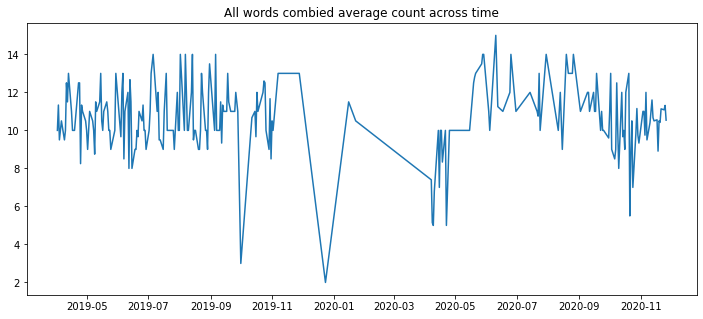

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(aa.sum(axis=1))
plt.title('All words combied average count across time')

In [ ]:
for i in aa.columns:
  if np.percentile(aa[i],90)!=0:
    print(i)

airchina
case
china
citi
covid
day
death
enjoy
fli
flight
get
ha
knowbeforeyougo
new
one
rt
thi
today
travel
world


#Perform 3 regex counts for at least 3 different tokens and plot the mean and median of this (per time period) over time
Examples: How many times does the word “good” appear over time? Be creative!
Can you explain these dynamics?

Words Selected: death, covid, china, travel (3 out of 4)

In [ ]:

import re

In [ ]:
final['death_count']=0
for i in final.index:
  final.loc[i,'death_count']= len(re.findall(r'dea\w*\s',final['clean_text'][i]))


In [ ]:
final['covid_count']=0
for i in final.index:
  final.loc[i,'covid_count']= len(re.findall(r'covi\w+\s*\d*',final['clean_text'][i]))


In [ ]:
final['china_count']=0
for i in final.index:
  final.loc[i,'china_count']= len(re.findall(r'chin[e,a]*\w*',final['clean_text'][i]))


###mean plot

In [ ]:
rgex=final.groupby(['date']).mean()[['china_count','covid_count','death_count']]

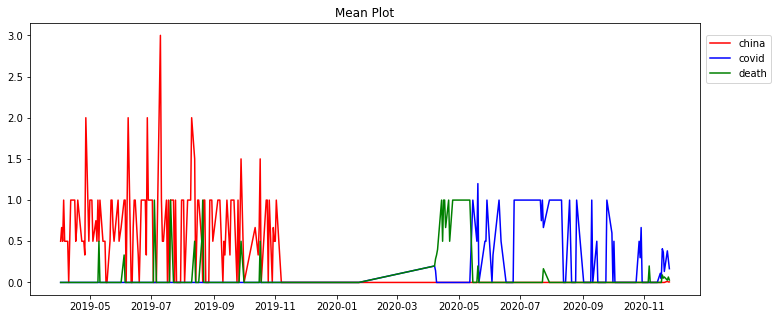

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(rgex.index, rgex['china_count'], "r-", label="china")
plt.plot(rgex.index, rgex['covid_count'], "b-", label="covid")
plt.plot(rgex.index, rgex['death_count'], "g-", label="death")
plt.legend(bbox_to_anchor=(1.01, 0.78), loc=3, borderaxespad=0)
plt.title('Mean Plot')
plt.show()

###median plot

In [ ]:
rgex2=final.groupby(['date']).median()[['china_count','covid_count','death_count']]

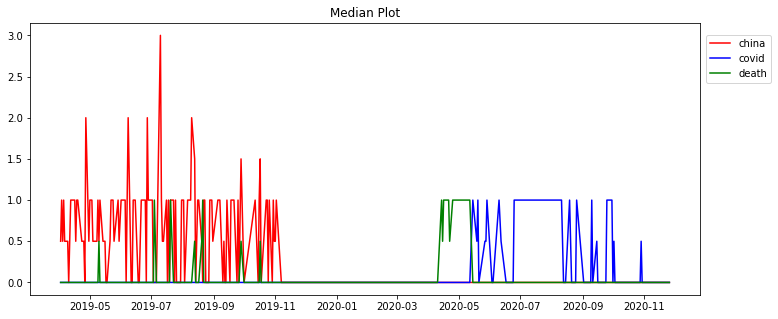

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(rgex2.index, rgex2['china_count'], "r-", label="china")
plt.plot(rgex2.index, rgex2['covid_count'], "b-", label="covid")
plt.plot(rgex2.index, rgex2['death_count'], "g-", label="death")
plt.legend(bbox_to_anchor=(1.01, 0.78), loc=3, borderaxespad=0)
plt.title('Median Plot')
plt.show()

###Explanation:
Basically the mean plot and the median plot share the same trend while the median plot is smoother than the mean since some median value happened to be 0 accidentally.

According to the twitter trend, different time periods have different dominant tipics. From 2019.05 to 2019.11. The dominant topic is about china while there is a short time around 2020.05 that the concerns about death have grown a lot and later on the topics have all changed to be realted with covid.

So there might be several reasons causing these issues:

1.First of all the companies in our dataset are from different industries. We originally chose companies from news media, airline industry and also covid realted news. But they are just representatives and bias must exist. So for instance, the topic of covid is not dominant before 2020.05.This might be because that those companies we chose didn't twit about covid before that time or the companies reported covid have not been taken into consideration.

2.Secondly, the related words have not all been taken into consideration. For instance, although we think about covid and covid19 at the same time when creating our expressions. However, nouns like corona, coronavirus which have the same meaning with covid should also be considered if we want to study covid issue specifically.

3.Finally the reason could also be that people's opinions have changed through time. Originally Americans may focus more on US-China relationsihp before the covid and even when covid just started. However, as the death number increases people tend to be frightened and focus more on death number on covid itself rather than politics issues.

#Run a Naïve Bayes Classifier to predict the binary variable you developed when creating the CSV file. Which words are most indicative of 1 and which of 0? (Word cloud of prediction result)

##Happy Twi

In [ ]:
sentences_df=sentences_df.drop('date',axis=1)

In [ ]:
nb = MultinomialNB()

In [ ]:
final.Happy_Twi

0       1.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1119    0.0
1120    0.0
1121    1.0
1122    1.0
1123    1.0
Name: Happy_Twi, Length: 1124, dtype: float64

In [ ]:
final['Market_Sentiment_ -_ Categorial']

0        1
1        1
2       -1
3       -1
4        1
        ..
1119    -1
1120    -1
1121    -1
1122    -1
1123    -1
Name: Market_Sentiment_ -_ Categorial, Length: 1124, dtype: object

In [ ]:
X = sentences_df.values
y = final.Happy_Twi
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [ ]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_class = nb.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.6548672566371682

In [ ]:
y_test.values

array([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.])

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class, labels=[0,1])

array([[27, 23],
       [16, 47]])

In [ ]:
metrics.recall_score(y_test.values, y_pred_class, pos_label=1)

0.746031746031746

In [ ]:
metrics.precision_score(y_test.values, y_pred_class, pos_label=1)

0.6714285714285714

In [ ]:
metrics.accuracy_score(y_test.values, y_pred_class)

0.6548672566371682

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=sw,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()   

In [ ]:
final_text=final.loc[y_test.index,:]

In [ ]:
final_text['pred']=y_pred_class

In [ ]:
pred_pos=final_text[final_text['pred']==1]['clean_text']
pred_neg=final_text[final_text['pred']==0]['clean_text']

Positive words


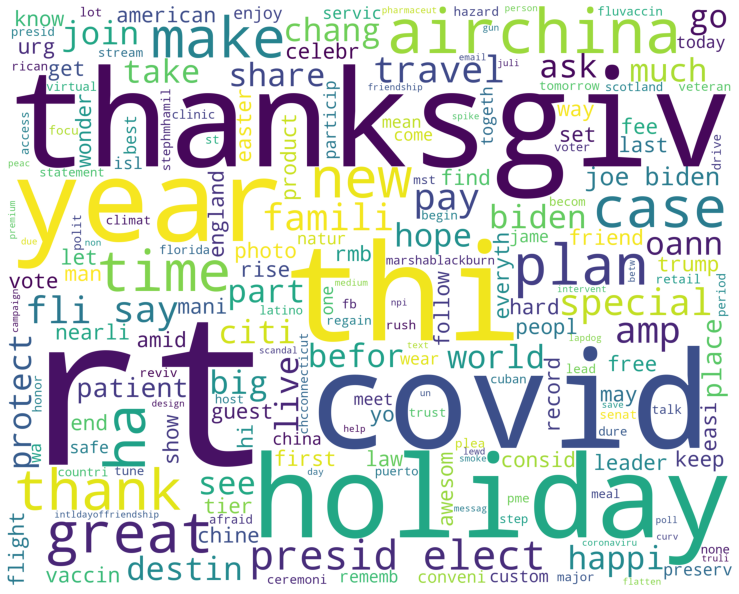

Negative words


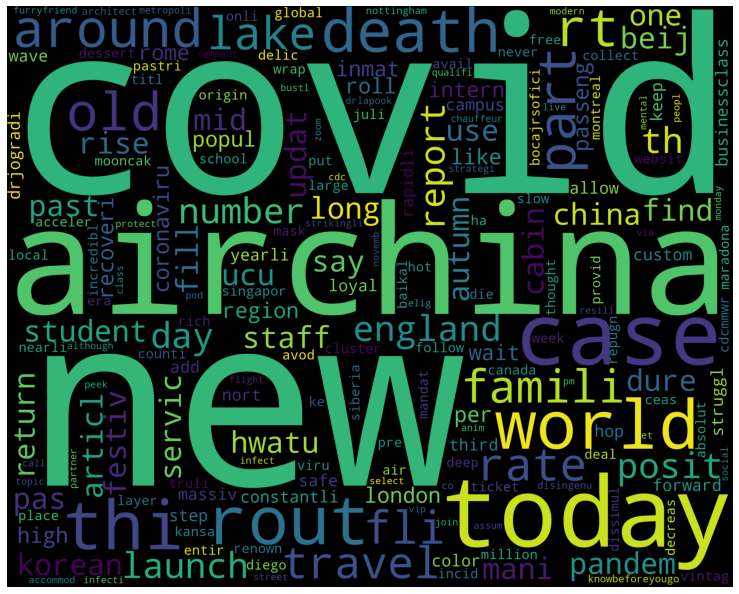

In [ ]:
print("Positive words")
wordcloud_draw(pred_pos,'white')
print("Negative words")
wordcloud_draw(pred_neg)

###Positive:new, thanksgiving, holiday,rt( rate )
###Negative: case, today,covid, airchina

##Market

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear')

In [ ]:
final[final['Market_Sentiment_ -_ Categorial']=='-']

,date,text,Happy_Twi,Percentage_change_continuous,Market_Sentiment_ -_ Categorial,new_text,tokens,clean_text,death_count,covid_count,china_count


In [ ]:
final=final.drop([232,233],axis=0).reset_index().drop('index',axis=1)

In [ ]:
vectorizer =  CountVectorizer()
X = vectorizer.fit_transform(final['clean_text'])

In [ ]:
sentences_df =    pd.DataFrame(columns=vectorizer.get_feature_names(),data           =           X.toarray())
sentences_df

,aaronkaterski,aaronsojourn,abbi,abc,abcnewsl,abigailwozniak,abl,abov,abroad,absolut,abus,academ,acceler,accept,access,acclaim,accommod,accompani,accord,account,accur,accus,achiev,acknowledg,acorn,across,act,action,activ,activenav,activist,actual,acumen,acupunctureuss,ad,add,addict,addit,address,adjust,...,worldkindnessday,worldpeaceday,worldwid,worri,wors,worsen,worship,worth,worthi,would,wr,wrap,write,writer,wsprigg,wuxi,wyom,xbox,xi,xwb,yang,ye,year,yearli,yep,yesterday,yet,yo,york,yorkshir,young,youth,yuuuup,zanzibar,zealand,zebrafish,zhujiang,zipper,zombi,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
sentences_df=sentences_df.drop('date',axis=1)

In [ ]:
X = sentences_df.values
y = final['Market_Sentiment_ -_ Categorial']
y=y.replace(-1,0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [ ]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred_class = nb.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.5663716814159292

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class, labels=[0,1])

array([[37, 22],
       [27, 27]])

In [ ]:
metrics.recall_score(y_test.values, y_pred_class, pos_label=1)

0.5

In [ ]:
metrics.precision_score(y_test.values, y_pred_class, pos_label=1)

0.5510204081632653

In [ ]:
final_text=final.loc[y_test.index,:]

In [ ]:
final_text['pred']=y_pred_class

In [ ]:
pred_pos=final_text[final_text['pred']==1]['clean_text']
pred_neg=final_text[final_text['pred']==0]['clean_text']

Positive words


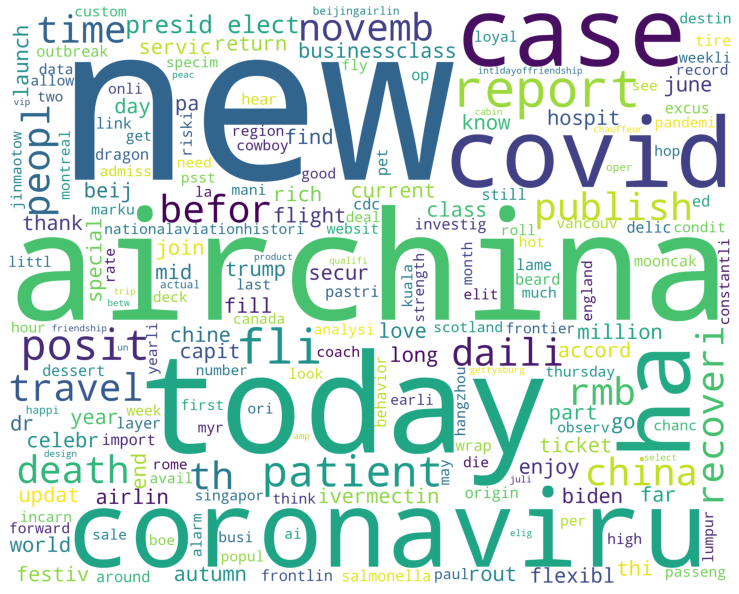

Negative words


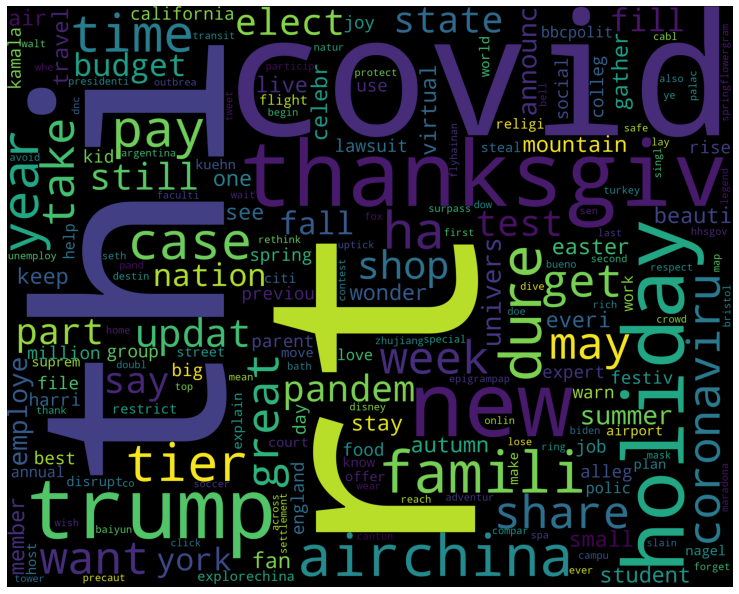

In [ ]:
print("Positive words")
wordcloud_draw(pred_pos,'white')
print("Negative words")
wordcloud_draw(pred_neg)

###Towards Market
###Positive:airchina, today, new...
###Negative: rate(rt), trump,covid



#Run a Support Vector Machine to predict the binary variable you developed when creating the CSV file. How does performance compare to that of NBC?

In [ ]:
X = sentences_df.values
y = final.Happy_Twi
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [ ]:
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_class = SVM.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.5663716814159292

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class, labels=[0,1])

array([[26, 27],
       [22, 38]])

In [ ]:
metrics.recall_score(y_test.values, y_pred_class, pos_label=1)

0.6333333333333333

In [ ]:
metrics.precision_score(y_test.values, y_pred_class, pos_label=1)

0.5846153846153846

In [ ]:
final_text=final.loc[y_test.index,:]

In [ ]:
final_text['pred']=y_pred_class

In [ ]:
pred_pos=final_text[final_text['pred']==1]['clean_text']
pred_neg=final_text[final_text['pred']==0]['clean_text']

Positive words


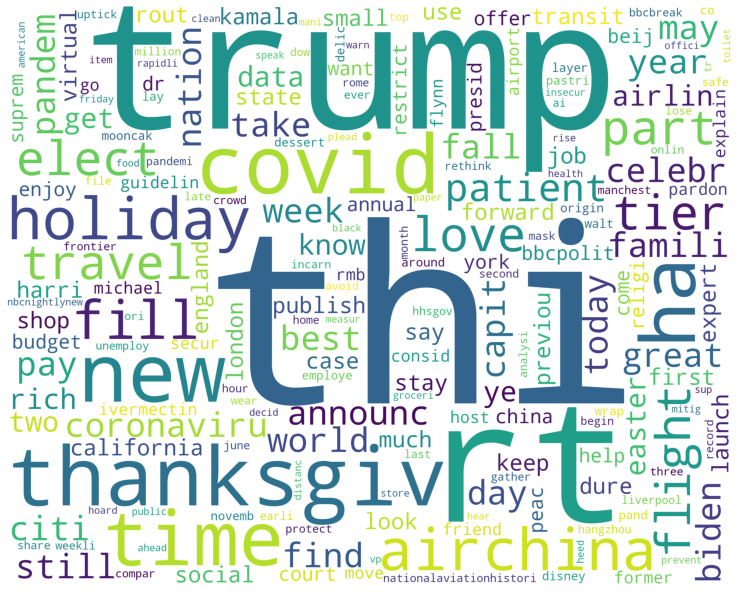

Negative words


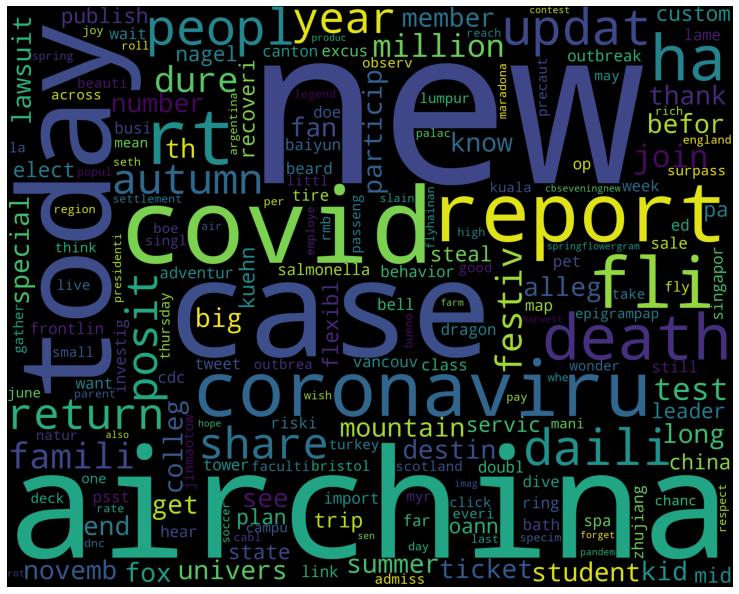

In [ ]:
print("Positive words")
wordcloud_draw(pred_pos,'white')
print("Negative words")
wordcloud_draw(pred_neg)

##Market

In [ ]:
X = sentences_df.values
y = final['Market_Sentiment_ -_ Categorial']
y=y.replace(-1,0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [ ]:
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_class = SVM.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.5752212389380531

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class, labels=[0,1])

array([[39, 20],
       [28, 26]])

In [ ]:
metrics.recall_score(y_test.values, y_pred_class, pos_label=1)

0.48148148148148145

In [ ]:
metrics.precision_score(y_test.values, y_pred_class, pos_label=1)

0.5652173913043478

In [ ]:
final_text=final.loc[y_test.index,:]

In [ ]:
final_text['pred']=y_pred_class

In [ ]:
pred_pos=final_text[final_text['pred']==1]['clean_text']
pred_neg=final_text[final_text['pred']==0]['clean_text']

Positive words


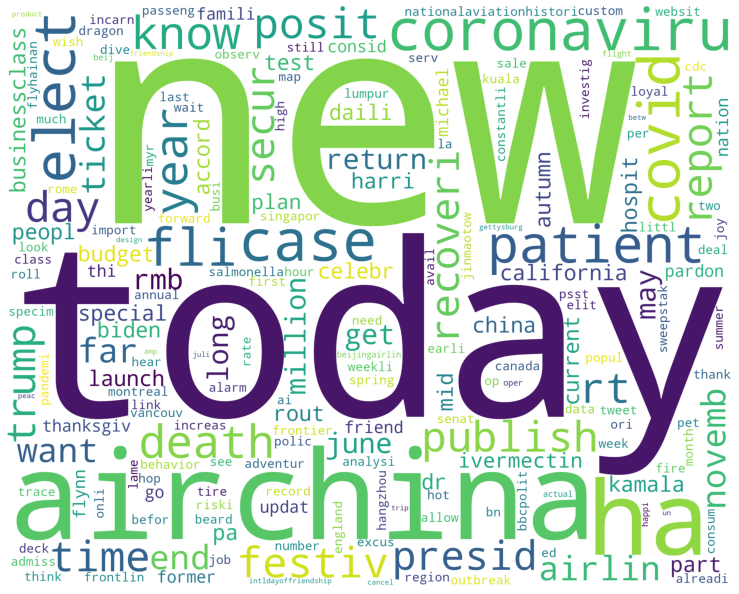

Negative words


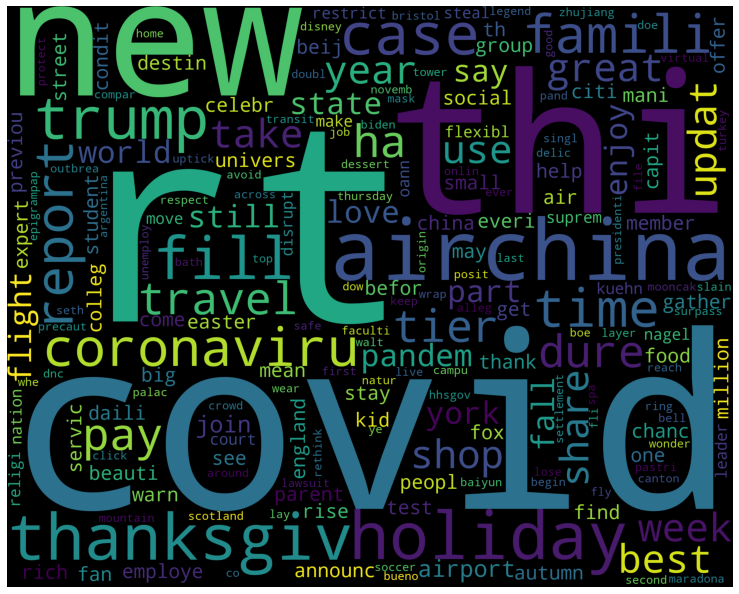

In [ ]:
print("Positive words")
wordcloud_draw(pred_pos,'white')
print("Negative words")
wordcloud_draw(pred_neg)

###Compared to NBC, the SVM model performs worse in happy twitter prediction with accuracy score of 56.6%, reacall 63.3% and precision 58.5% while the NBC tends to have 65.5% accuracy, 74.6% recall and 67% precission.

###However, the SVM predicts a little better if we want to predict market sentiment since the total accuracy score of SVM is 57.5%, higher than NBC with 56.6% accuracy and precison score of SVM is 56.5%, higher than NBC with 55% precison score